Загрузим данные и очистим до необходимого формата

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

txts = ['./external_data/war_and_peace/tom_1.txt', './external_data/war_and_peace/tom_2.txt', './external_data/war_and_peace/tom_3.txt', './external_data/war_and_peace/tom_4.txt']

contents = ""
for txt in txts:
    with open(txt, encoding='utf-8') as stream:
        text = stream.read()
        text = re.sub("[^А-Яа-я| |.|!|?]","",text)
        text = re.sub("[.|!|?]"," ",text)
        text = text.upper()
        contents = contents + " " + text if len(contents)>0 else text

words = []
for word in contents.split(" "):
    if (len(word)>0):
       words.append(word)    

Построим матрицу переходных вероятностей и выведем как корреляционную матрицу

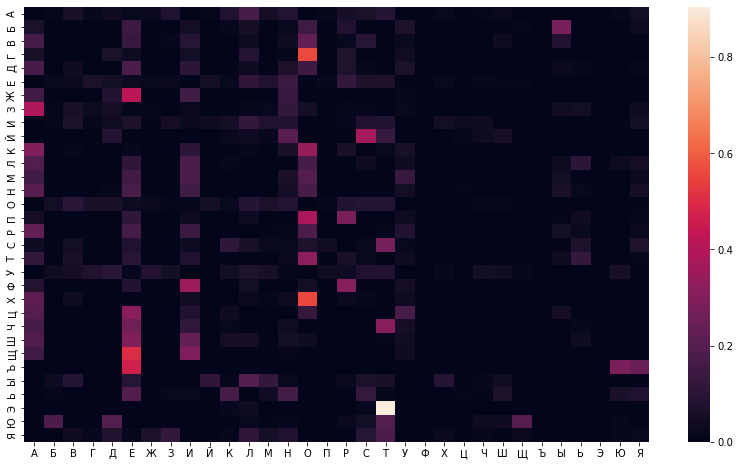

In [2]:
RUSSIAN = "АБВГДЕЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ"
POS = {l: i for i, l in enumerate(RUSSIAN)}
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))
   
def split(s):
    return [char for char in s]
     
for word in words:
    if (len(word)>1):
        for cp, cn in zip(word[:-1], word[1:]):
            probabilities[POS[cp], POS[cn]] += 1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])
  
df = pd.DataFrame(probabilities, index=(c for c in RUSSIAN), columns=(c for c in RUSSIAN))

plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Запишем результаты матрицы в CSV

In [3]:
df.to_csv('./processed/res_matrix.csv')